In [1]:
# LSTM for Stock Price Prediction
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# Get the data using yfinance library from past until now
import yfinance as yf
data = yf.download('BTPS.JK', start='2018-01-01', end='2024-06-23')

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date', ylabel='Close Prices Rupiah (Rp)'>

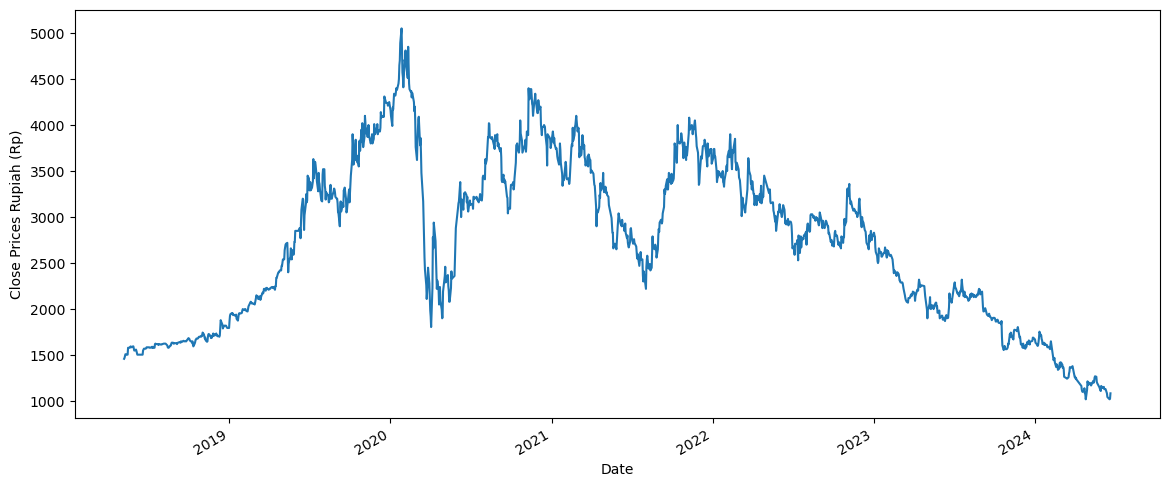

In [3]:
plt.figure(figsize=(14,6))
plt.xlabel('Days')
plt.ylabel('Close Prices Rupiah (Rp)')
data["Close"].plot()

In [4]:
len(data)

1505

In [5]:
# Doing Exploratory Data Analysis
data.info()
data.describe()
# data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1505 entries, 2018-05-08 to 2024-06-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1505 non-null   float64
 1   High       1505 non-null   float64
 2   Low        1505 non-null   float64
 3   Close      1505 non-null   float64
 4   Adj Close  1505 non-null   float64
 5   Volume     1505 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.3 KB


,Open,High,Low,Close,Adj Close,Volume
count,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1.505000e+03
mean,2729.883721,2778.691030,2675.382060,2722.398671,2423.310688,1.638610e+07
std,877.922117,899.590913,854.605796,875.447128,748.748680,1.899024e+07
min,1020.000000,1030.000000,1000.000000,1020.000000,1020.000000,0.000000e+00
25%,1950.000000,1965.000000,1930.000000,1945.000000,1778.450439,4.592600e+06
50%,2800.000000,2850.000000,2730.000000,2790.000000,2495.231689,9.206800e+06
75%,3400.000000,3470.000000,3330.000000,3400.000000,3003.189453,2.249980e+07
max,5050.000000,5125.000000,4880.000000,5050.000000,4359.793945,1.622200e+08


In [6]:
data.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-20,1020.0,1030.0,1000.0,1025.0,1025.0,9979100
2024-06-21,1030.0,1110.0,1025.0,1085.0,1085.0,12652100


In [7]:
# Make a new dataframe to only include the Close column
new_data = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = new_data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)


In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [12]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays
x_train, y_train = numpy.array(x_train), numpy.array(y_train)

# Reshape the data
x_train = numpy.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.10918114, 0.11166253, 0.12158809, 0.12034739, 0.12034739,
       0.12034739, 0.13895782, 0.13895782, 0.13895782, 0.14143921,
       0.1426799 , 0.14143921, 0.14019851, 0.1426799 , 0.1426799 ,
       0.13647643, 0.13151365, 0.13151365, 0.13399504, 0.13027295,
       0.12531017, 0.12034739, 0.12034739, 0.12034739, 0.12034739,
       0.12034739, 0.12034739, 0.12034739, 0.12034739, 0.12034739,
       0.13151365, 0.13399504, 0.13647643, 0.13647643, 0.13647643,
       0.13771712, 0.14019851, 0.14019851, 0.14019851, 0.14019851,
       0.14019851, 0.13895782, 0.13895782, 0.14019851, 0.14143921,
       0.13895782, 0.14143921, 0.13895782, 0.13895782, 0.14888337,
       0.15012407, 0.14888337, 0.14888337, 0.14888337, 0.14888337,
       0.14640199, 0.14764268, 0.14888337, 0.14764268, 0.14764268])]
[0.14764267990074442]

[array([0.10918114, 0.11166253, 0.12158809, 0.12034739, 0.12034739,
       0.12034739, 0.13895782, 0.13895782, 0.13895782, 0.14143921,
       0.1426799 , 0.14143921, 0.14

(1144, 60, 1)

In [16]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(25, return_sequences=False))
model.add(Dense(12))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# Train the model with epoch 100
model.fit(x_train, y_train, batch_size=1, epochs=1)

1144/1144 [==============================] - 37s 29ms/step - loss: 0.0039


In [18]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = numpy.array(x_test)

# Reshape the data
x_test = numpy.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

10/10 [==============================] - 1s 22ms/step


In [23]:
# Get the root mean squared error (RMSE)
rmse = numpy.sqrt(numpy.mean(predictions - y_test) ** 2)
print("RMSE :",rmse)

RMSE : 1.7652531113735466


C:\Users\Galan\AppData\Local\Temp\ipykernel_22588\2752870389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


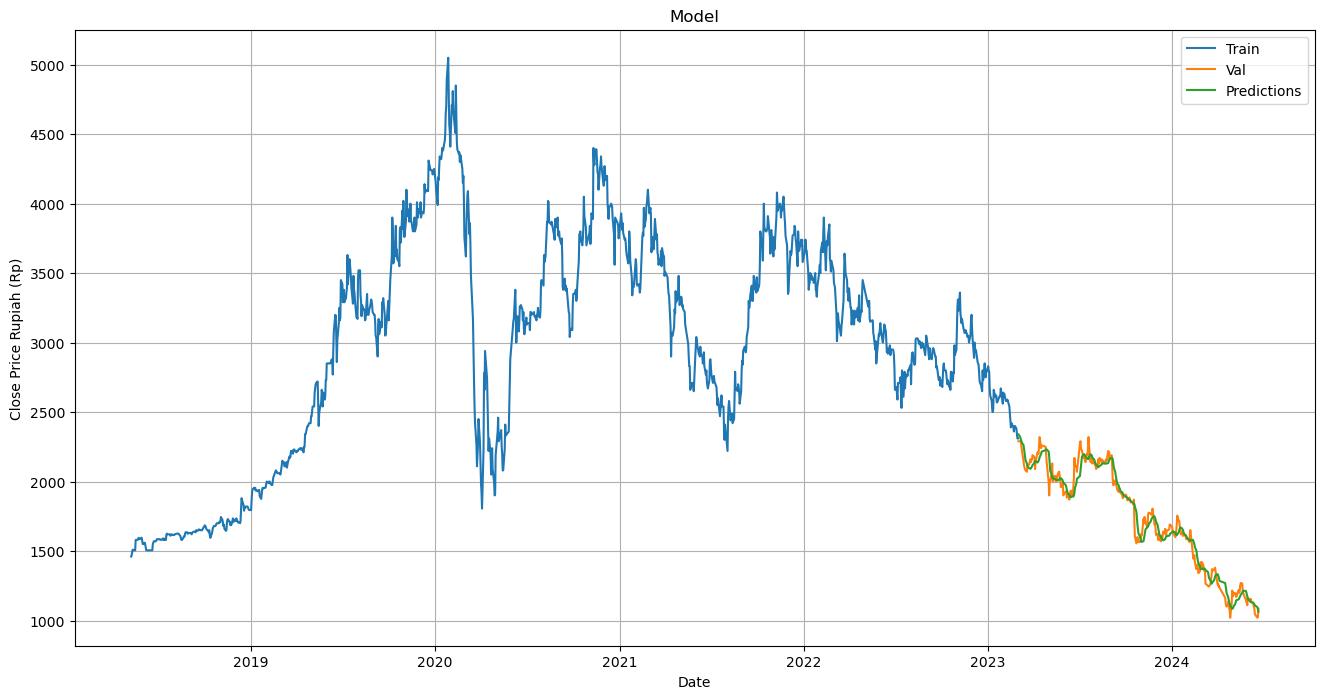

In [29]:
# Plot the data
train = new_data[:training_data_len]
valid = new_data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price Rupiah (Rp)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.grid('visible= True')
plt.show()

In [50]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-03-03,2290.0,2339.381348
2023-03-06,2290.0,2324.492188
2023-03-07,2290.0,2311.049316
2023-03-08,2280.0,2299.999756
2023-03-09,2250.0,2290.231201
...,...,...
2024-06-13,1085.0,1116.443970
2024-06-14,1045.0,1108.358643
2024-06-19,1020.0,1096.038940


In [51]:
# make a new column in the valid to show the difference between the close and predictions
valid['Difference'] = valid['Close'] - valid['Predictions']
valid

C:\Users\Galan\AppData\Local\Temp\ipykernel_22588\2577514460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Difference'] = valid['Close'] - valid['Predictions']


,Close,Predictions,Difference
Date,,,
2023-03-03,2290.0,2339.381348,-49.381348
2023-03-06,2290.0,2324.492188,-34.492188
2023-03-07,2290.0,2311.049316,-21.049316
2023-03-08,2280.0,2299.999756,-19.999756
2023-03-09,2250.0,2290.231201,-40.231201
...,...,...,...
2024-06-13,1085.0,1116.443970,-31.443970
2024-06-14,1045.0,1108.358643,-63.358643
2024-06-19,1020.0,1096.038940,-76.038940


1/1 [==============================] - 0s 33ms/step


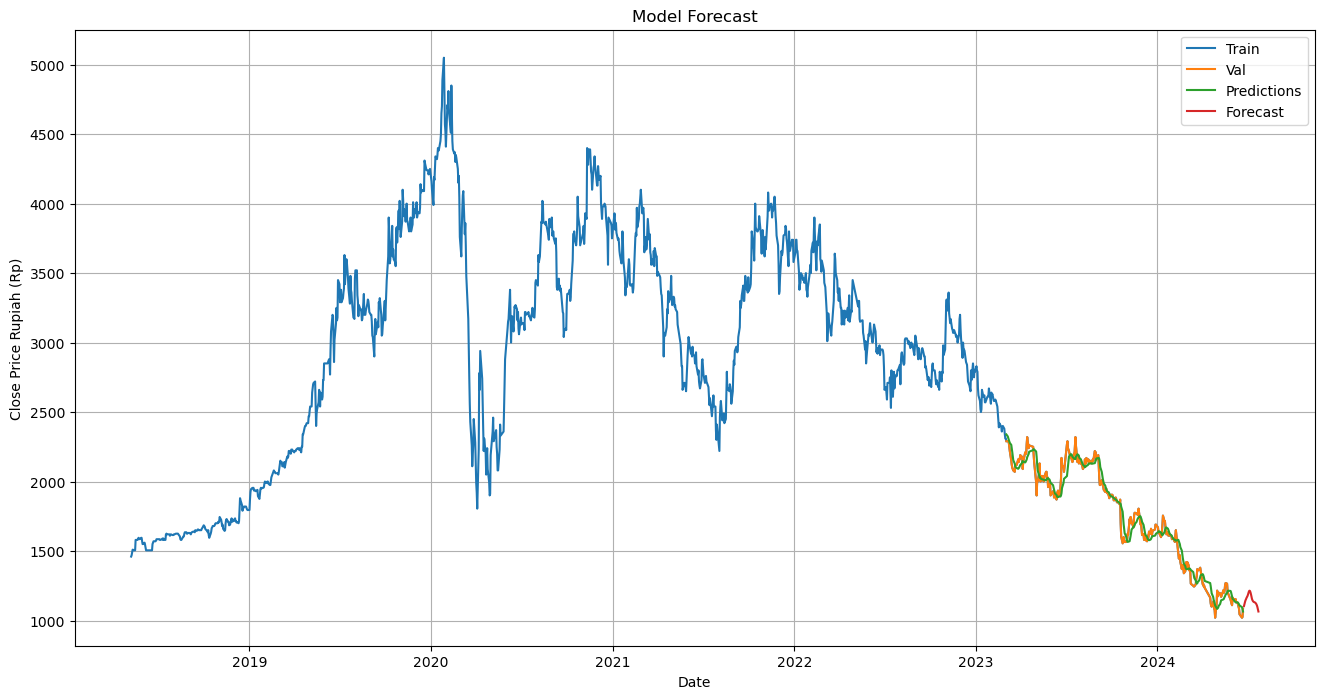

In [52]:
# Forecasting the next 30 days
# Generate the forecast for the next 30 days
forecast = model.predict(x_test[-30:])
forecast = scaler.inverse_transform(forecast)
forecast = forecast.flatten()
forecast_dates = pandas.date_range(start='2024-06-23', periods=30)
forecast = pandas.DataFrame(data=forecast, index=forecast_dates, columns=['Forecast'])

# Plot the forecast with the whole train and test data
plt.figure(figsize=(16,8))
plt.title('Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price Rupiah (Rp)')
plt.plot(new_data['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.plot(forecast)
plt.legend(['Train', 'Val', 'Predictions', 'Forecast'], loc='upper right')
plt.grid('visible= True')
plt.show()

In [53]:
# Show the forecast
forecast

,Forecast
2024-06-23,1104.018066
2024-06-24,1118.763184
2024-06-25,1132.968506
2024-06-26,1145.323608
2024-06-27,1152.762085
2024-06-28,1161.984009
2024-06-29,1169.165283
2024-06-30,1175.993652
2024-07-01,1186.121338
2024-07-02,1198.520508


In [54]:
# Save the model
model.save('LSTM Stock Prediction.h5')
print("Model saved as LSTM Stock Prediction.h5")

Model saved as LSTM Stock Prediction.h5
